# Scientific Computing: Exercise Set 3

Author: 
- Kevin de Vries

Student number:
- 10579869

This environment makes use of Python version 3.6.3

TODO:

Exercise 3.1:
- Implement the eigenmodes for any rectangular drum $\checkmark$
- Implement the eigenmodes for a circular drum $\checkmark$
- Investigate dependency on L $\checkmark$
- Construct time-dependent solutions and make an animated plot

Exercise 3.3:
- Solve the diffusion equation using a direct method and plot the result $\checkmark$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.linalg as linalg
import scipy.sparse.linalg as sp_linalg

from source_exercise3 import *

# Eigenmodes of drums or membranes of different shapes

## Square shape

In [20]:
# Step size in the x direction
N = 100
Lx,Ly = 1,1

(Nx,Ny),matrix = matrix_drum_rectangular(N,(Lx,Ly))

K_vals,modes = sp_linalg.eigsh(matrix,k=8,which="SM")

# Sorts from smallest magnitude to largest
sort_idx = np.argsort(abs(K_vals))

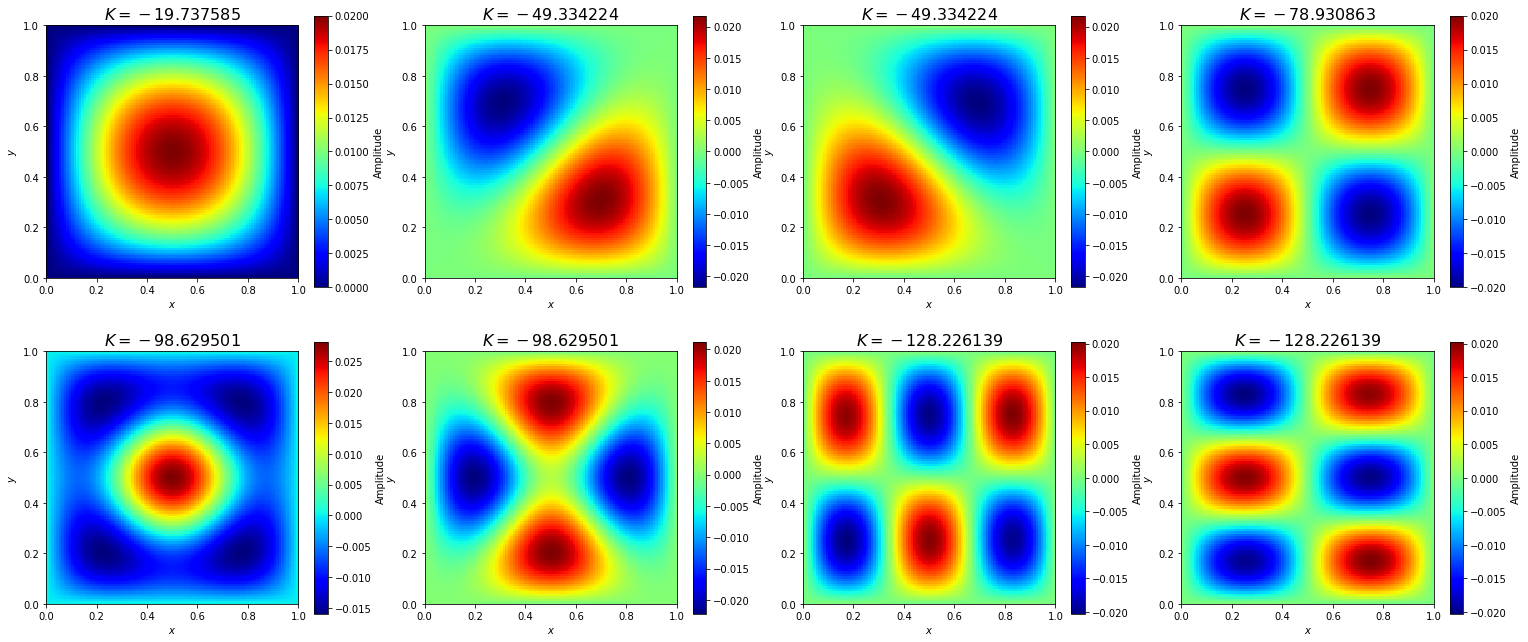

In [27]:
plt.figure(figsize=(26,11))
for n in range(len(K_vals)):
    res = np.zeros((Nx+1,Ny+1))
    res[1:Nx,1:Ny] = modes[:,sort_idx[n]].reshape(Nx-1,Ny-1)
    
    plt.subplot(2,4,n+1)
    plt.title(r"$K = %f$" % K_vals[sort_idx[n]],fontsize=16)
    plt.xlabel(r"$x$")
    plt.ylabel(r"$y$")
    plt.imshow(res.T,extent=[0,Lx,0,Ly],origin="lower",cmap="jet")
    plt.colorbar(label="Amplitude")

plt.show()

## Rectangular shape

In [4]:
# Step size in the x-direction
N = 100
Lx,Ly = 1,2

(Nx,Ny),matrix = matrix_drum_rectangular(N,(Lx,Ly))

K_vals,modes = sp_linalg.eigsh(matrix,k=8,which="SM")

# Sorts from smallest magnitude to largest
sort_idx = np.argsort(abs(K_vals))

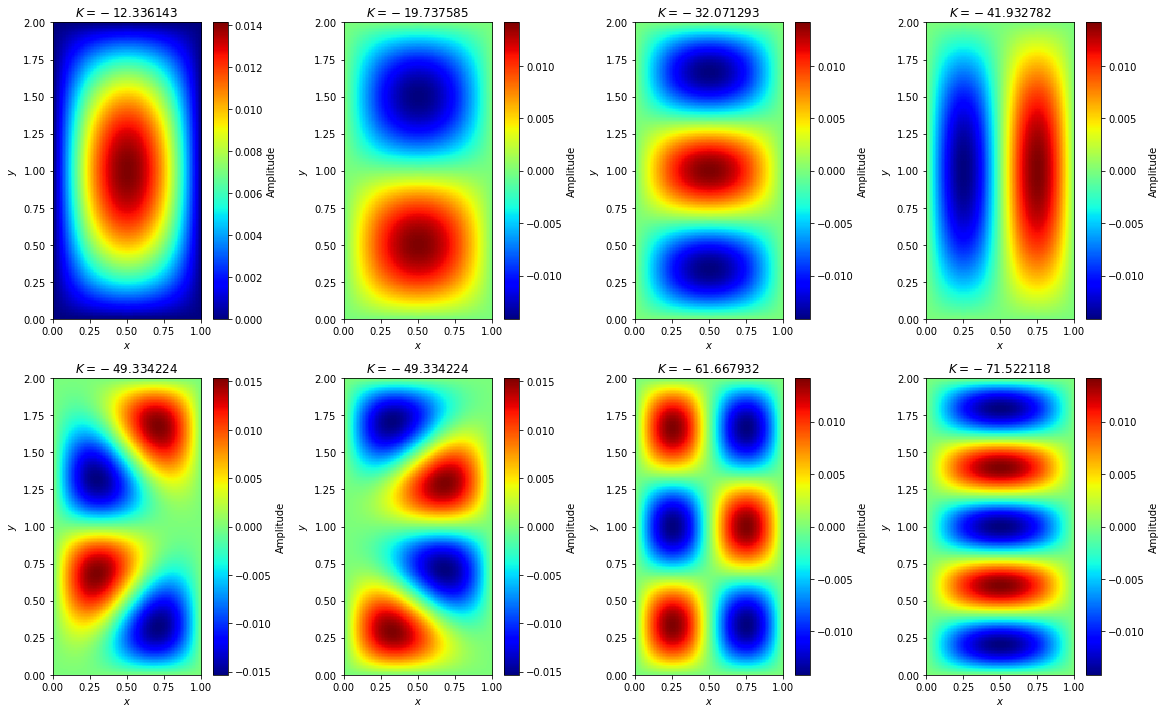

In [5]:
plt.figure(figsize=(20,12))
for n in range(len(K_vals)):
    res = np.zeros((Nx+1,Ny+1))
    res[1:Nx,1:Ny] = modes[:,sort_idx[n]].reshape(Nx-1,Ny-1)
    
    plt.subplot(2,4,n+1)
    plt.title(r"$K = %f$" % K_vals[sort_idx[n]])
    plt.xlabel(r"$x$")
    plt.ylabel(r"$y$")
    plt.imshow(res.T,extent=[0,Lx,0,Ly],origin="lower",cmap="jet")
    plt.colorbar(label="Amplitude")

plt.show()

## Circular shape

In [28]:
N = 100
L = 1

matrix,inclusion = matrix_drum_circular(N,L)

K_vals,modes = sp_linalg.eigsh(matrix,k=8,which="SM")

# Sorts from smallest magnitude to largest
sort_idx = np.argsort(abs(K_vals))

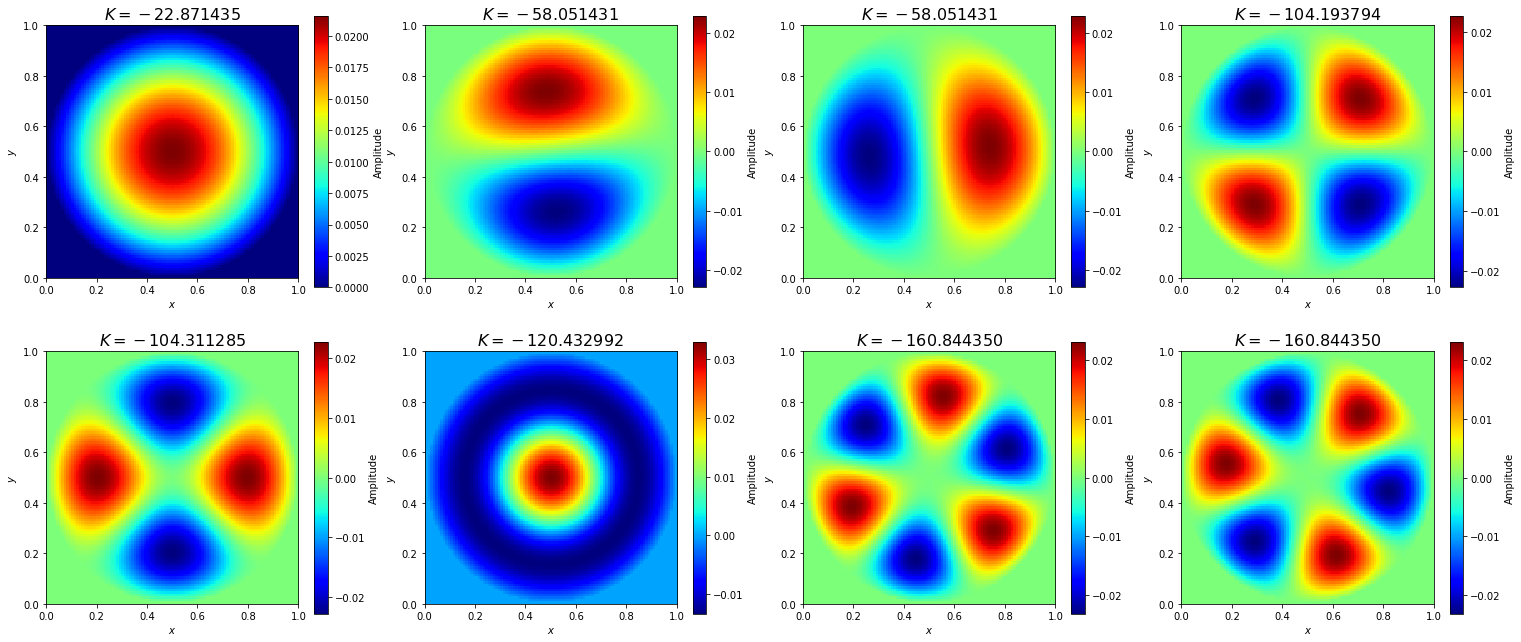

In [30]:
plt.figure(figsize=(26,11))
for n in range(len(K_vals)):
    res = np.zeros((N+1,N+1))
    res[inclusion] = modes[:,sort_idx[n]]
    
    plt.subplot(2,4,n+1)
    plt.title(r"$K = %f$" % K_vals[sort_idx[n]],fontsize=16)
    plt.xlabel(r"$x$")
    plt.ylabel(r"$y$")
    plt.imshow(res.T,extent=[0,L,0,L],origin="lower",cmap="jet")
    plt.colorbar(label="Amplitude")

plt.show()

## Eigenfrequencies dependence on L

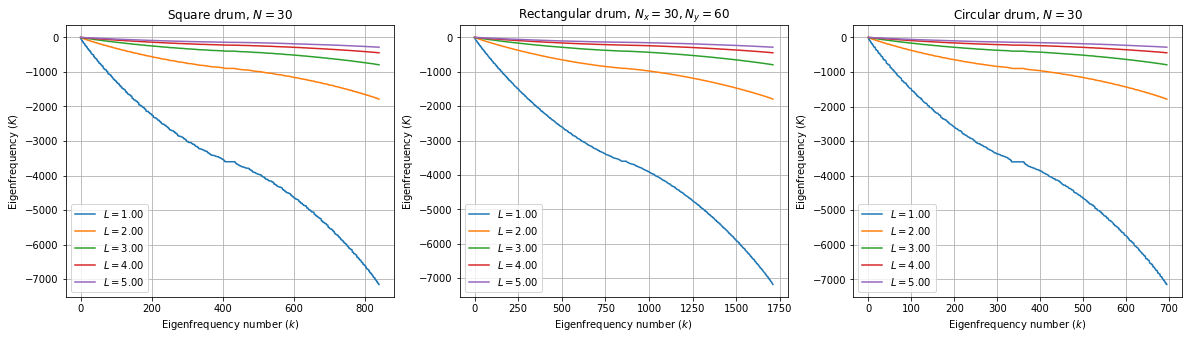

In [8]:
N = 30

plt.figure(figsize=(20,5))

# Square drum
plt.subplot(1,3,1)
plt.title("Square drum, $N = %i$" % N)
plt.xlabel("Eigenfrequency number ($k$)")
plt.ylabel(r"Eigenfrequency ($K$)")

for L in range(1,5+1):
    (Nx,Ny),matrix = matrix_drum_rectangular(N,(L,L))

    size = matrix.shape[0]
    
    K_vals,modes = sp_linalg.eigsh(matrix,k=size-1, which="SM")
    
    # Sorts from smallest magnitude to largest
    sort_idx = np.argsort(abs(K_vals))
    
    plt.plot(K_vals[sort_idx],label=r"$L = %.2f$" % L)

plt.legend()
plt.grid(True)

# Rectangular drum
plt.subplot(1,3,2)
plt.title("Rectangular drum, $N_x = %i, N_y = %i$" % (N,2*N))
plt.xlabel("Eigenfrequency number ($k$)")
plt.ylabel(r"Eigenfrequency ($K$)")

for L in range(1,5+1):
    (Nx,Ny),matrix = matrix_drum_rectangular(N,(L,2*L))

    size = matrix.shape[0]
    
    K_vals,modes = sp_linalg.eigsh(matrix,k=size-1, which="SM")
    
    # Sorts from smallest magnitude to largest
    sort_idx = np.argsort(abs(K_vals))
    
    plt.plot(K_vals[sort_idx],label=r"$L = %.2f$" % L)

plt.legend()
plt.grid(True)
    
# Circular drum
plt.subplot(1,3,3)
plt.title("Circular drum, $N = %i$" % N)
plt.xlabel("Eigenfrequency number ($k$)")
plt.ylabel(r"Eigenfrequency ($K$)")

for L in range(1,5+1):
    matrix,inclusion = matrix_drum_circular(N,L)

    size = matrix.shape[0]
    
    K_vals,modes = sp_linalg.eigsh(matrix,k=size-1, which="SM")
    
    # Sorts from smallest magnitude to largest
    sort_idx = np.argsort(abs(K_vals))
    
    plt.plot(K_vals[sort_idx],label=r"$L = %.2f$" % L)

plt.legend()
plt.grid(True)
plt.show()

## Time dependent solutions

# Direct methods for solving steady state problems

In [13]:
N = 300
L = 4
sx,sy,sc = sources = (np.array([0.6]),np.array([1.2]),np.array([1.0]))

conc,inclusion,source_map,sc_ordered = diffusion_equation_direct(N,L,sources)

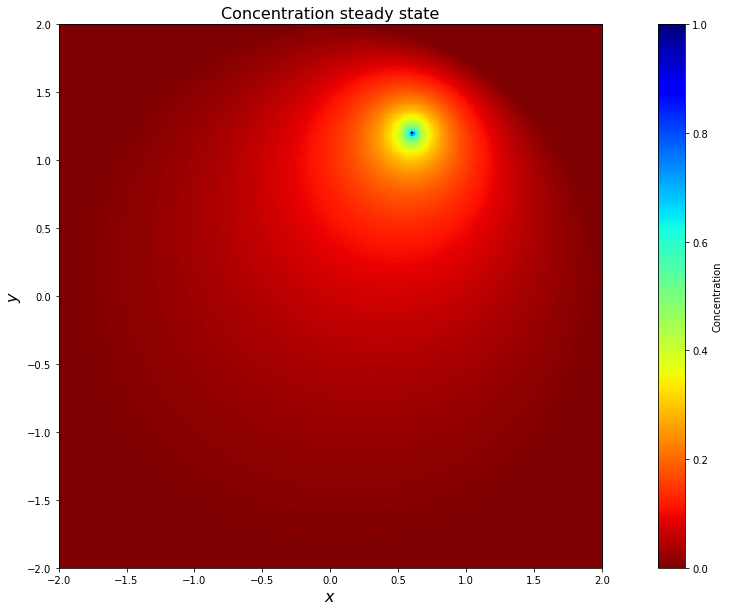

In [19]:
plt.figure(figsize=(20,10))

# Construct the resulting steady state
res = np.zeros((N+1,N+1))
res[inclusion] = conc
res[source_map] = sc_ordered

plt.title(r"Concentration steady state",fontsize=16)
plt.xlabel(r"$x$",fontsize=16)
plt.ylabel(r"$y$",fontsize=16)
plt.imshow(res.T,extent=[-L/2,L/2,-L/2,L/2],origin="lower",cmap="jet_r")
plt.colorbar(label="Concentration")

plt.show()